In [26]:
!pip install -q PlyFile deepdiff
import re
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from progressbar import progressbar, ProgressBar
import keras.backend as K
import sys, os
import pickle
import time, datetime
import cv2
import math
import importlib
import matplotlib.pyplot as plt

In [ ]:
!git -C /content/deep_ga/ pull || git clone https://github.com/InigoMoreno/deep_ga
sys.path.append('/content/deep_ga')
import deep_ga

Already up to date.


In [ ]:
W=10
N=100
x=np.linspace(0,W,N)
y=np.linspace(0,W,N)
xv, yv = np.meshgrid(x,y)
deep_ga.set_scale(5)

def pcl(y_true, y_pred):
    mask = K.less(y_true, 5)
    return K.mean(K.switch(mask, K.square(y_pred), K.square(2*K.maximum(5 - y_pred, 0))))
def msle(y_true, y_pred, x=1):
    return K.mean(K.square(K.log(y_true+x)-K.log(y_pred+x)));

# w=lambda y:1-K.tanh(y/5)
deep_ga.set_scale(2)
w=lambda y:1/(1+x*5)
losses = {
    "MSE": lambda yt,yp: keras.losses.MSE([yt],[yp]),
    "MSLE": msle,
    # "MSLE2": lambda yt,yp: msle(yt,yp,0.001)
    "MAE": lambda yt,yp: keras.losses.MAE([yt],[yp]),
    # "MSRE2": lambda yt,yp:K.mean(K.square((yt-yp)/(yt+5))),
    # "SMAPE": lambda yt,yp: K.abs(yt-yp)/(yt+yp),
    # "LOGACC": lambda yt,yp: K.log(yp/(yt+1e-10)),
    # "MAPE": lambda yt,yp: keras.losses.mean_absolute_percentage_error([yt],[yp]),
    "WMSE": deep_ga.doomloss,
    "PCL": pcl,
    # "X": lambda x,y: x
    # "BCE": deep_ga.binary_cross_entropy,
}

res={}
for name, loss in losses.items():
  print(name)
  res[name]=np.array(list(map(lambda xi,yi: list(map(loss,xi,yi)),xv,yv)))



MSE
MSLE
MAE
WMSE
PCL


None


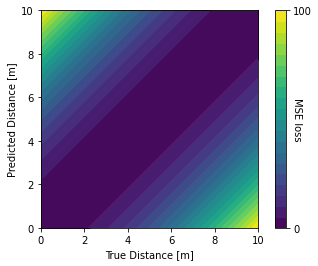

None


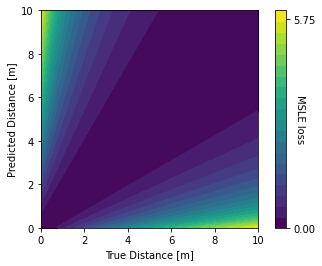

None


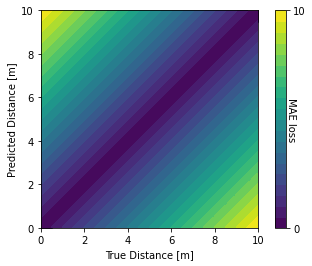

None


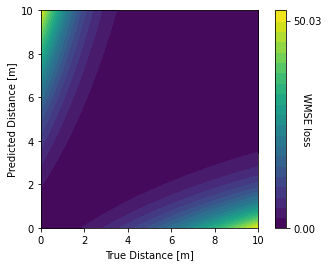

None


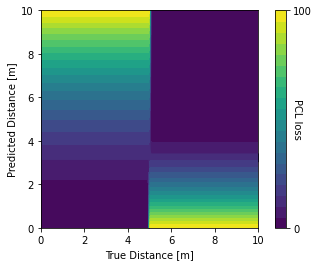

In [ ]:
for i, (name, r) in enumerate(res.items()):
  # plt.subplot(2,2,i+1)
  # plt.imshow(r,origin="lower",extent=(0,W,0,W))
  plt.gca().set_aspect("equal")
  # plt.title(name)
  cnt = plt.contourf(x,y,r,20)
  for c in cnt.collections:
      c.set_edgecolor("face")
  plt.ylabel("Predicted Distance [m]")
  plt.xlabel("True Distance [m]")
  cb=plt.colorbar()
  print(plt.clim())
  cb.set_ticks((0,np.max(r)))
  cb.solids.set_edgecolor("face")
  cb.set_label(f"{name} loss",labelpad=-10, rotation=270)
  plt.savefig(f"{name}.pdf",dpi=500, bbox_inches = 'tight',
      pad_inches = 0)
  plt.show();

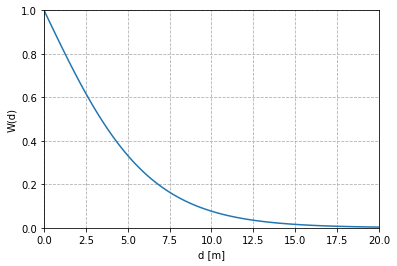

In [38]:
W2=20
x2=np.linspace(0,W2,100)
plt.plot(x2,1-np.tanh(x2*0.80642766/5))
plt.ylim((0,1))
plt.xlim((0,W2))
plt.xlabel("d [m]")
plt.ylabel("W(d)")
plt.grid(linestyle="--")
plt.savefig(f"weight.pdf",dpi=500, bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

In [ ]:
from google.colab import files
for name in losses.keys():
  files.download(f"{name}.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>